## G489/589 Advanced Geospatial Data Analysis in Python: In-class Assessment 3
**Indiana University  
Spring 2019  
Dr. Natasha MacBean**

### Part 1 (Question and Answer Section - 20 points)
Double click on each markdown box to write the answer.

1. You have two variables: a = 10 and b = 20. Write an **if** statement to check if b is greater than or equal to a, and prints "ok" if that statement is true, **else** if the statement is not true, it prints "not ok". **[1 point]**

ANSWER:   
if b >= a:  
    print("ok")  
else:  
    print("not ok")  

2. What is the numpy function for calculating a mean over a *masked* array? **[1 point]**

ANSWER: np.ma.mean() 

3. Which numpy function would you use to check the sizes of all dimensions of an array? **[1 point]**

ANSWER: np.shape()

4. You have a numerical 3-dimensional array of floats called "data", which consists of the dimensions (ntsteps, nrows, ncols), where ntsteps is the number of timesteps, and nrows/ncols are the number of rows/columns. Write the numpy function you would use to calculate the standard deviation over the timestep dimension. **[1 point]**

ANSWERR: np.std(data, axis=0)

5. You have a 1-dimensional numerical array of length 200. What numpy function would you use to convert this array into a 2-dimensional array with 100 rows and 2 columns? (*For now do not worry about the order that it is filling out the rows and columns)*. **[1 point]**

ANSWER: array.reshape((100,2)) or array = np.reshape(array, (100,2))

6. What python or numpy function would you use to create a numerical array that started with the number 1 and ended with the number 10 (with a step of 1 for each number)? **[1 point]**

ANSWER:  
range(1,11)
np.arange(1,11)

7. You have a variable "filelist" that constains a list of all the .csv files you have in a given directory. Which python method would you use to check how many .csv files there are in your filelist? **[1 point]**

ANSWER: len()

8. You know that each of the .csv files in your filelist has the format "site_name.csv" (where "site_name" is the name of each site in the list). Write a loop that loops over the filelist and extracts the **site name for each site** into a new list called "sites" using the method string.split **[2 points]**

ANSWER:   
sites = []  
for f in filelist:  
    sites.append(f.split('.')[0])

9. Write out both the steps needed, and the code you would use, to perform a KMeans clustering algorithm to a set of data that contains 200 observations (nsamples or nrows) and 5 features (nfeatures or ncols). Create 2 clusters and save your resultant cluster labels to an array called "labels2".  Your input data are in a numerical floating point arrray in a file called "data.txt". There are no column headings in the data.txt file. Describe the steps you would take to complete this task from the beginning, including importing the library and reading in the data etc. For each step also write the code you would need. *Note: Do not execute the code, just write down the steps you would take and the syntax of code you would use.* **[10 points]**

ANSWER:
- *# load the libraries needed*   
from sklearn.cluster import KMeans  
import numpy as np  
- *# load the data using np.loadtxt as they are saved as a simple numerical array*  
data = np.loadtxt("data.txt")  
- *# first set-up the KMeans model*  
model = KMeans(n_clusters=2)  
- *# fit the data to the model*   
model.fit(data)  
- *# label the clusters in the model and save it to an arrray called "labels2"*   
labels2 = model.predict(data)  


10. Following on from the previous question, what would the length of the final array "labels2" be? **[1 point]**

ANSWER:
200

### Part 2 (Writing Code - 30 points)

In this exercise we'll be working with flux data from the Santa Rita site between 2009 and 2014. The file "FLUXNET_US-SRG_Daily_ET_Met_2009-2014.csv" contains ET data (evapotranspiration - which is both evaporation of water from bare surfaces and transpiration of moisture from plants) as well as four meteorological variables: TAir (air temperature), Precip, VPD (vapor pressure deficit) and PA (surface air pressure).

The objective of this exericse is to work out which meteorological variable explains most of the variance in ET. I.e. the task is to calculate the R$^{2}$ (r-squared) value - i.e. the square of the correlation - between ET and each of the 4 different meteorological variables and then print out the values to see which one is highest.

First you will need to calculate the correlation using any of the following methods, inlcuding:

- np.corrcoef()
- scipy.stats.pearsonr (see Exercise 11)
- or any of the linear regression methods we learned (Exericses 12 and 13)

*Note: Beware of which linear regression methods give you R, and which directly give you R$^{2}$. If you calculate the correlation coefficient you then need to square the values to get the R$^{2}$.*

You will get the most marks for making your code as clean and efficient as possible. For example, your code will be "cleaner" if you use a for loop to loop over the meteorological variables and perform the calculation within the loop.

**First, in the markdown box below write your logic in normal/plain english to explain the steps you will need to complete this exercise. Think of this as a plan for your script. [5 points out of 30]**

**LOGIC FOR YOUR CODE:** 
- import libraries
- read in data using pandas and check with printing head() that it's read in correctly
- set-up X as ET data
- set-up Y that will loop over the other meteorological variables (Tair, Precip, VPD and PA) that I will define as a loop that I can loop over (loop not necessary in final answers, but you will get an extra mark for it)
- (optional) plot a linear regression plot using seaborn
- if using a loop, set-up a "r2" array to save the r^2 for each met variable
- loop over the met vars and use either numpy, scipy.stats pearsonr, or any of the linear regression method to perform the linear regression and save/print the r (r2)

**Now in the code boxes below write the actual python script you need to complete this excercise. [20 points out of 30]** 

- Do not forget to comment your code **[3 points out of 30]**! (I have given you a head start in the box below).

*NOTE! After you complete the coding task, answer the final question in the markdown below based on your calculations **[2 points out of 30]**.*

In [9]:
# - import libraries
import pandas as pd
import numpy as np
from sklearn import linear_model 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# - read in data
data = pd.read_csv('../data/fluxnet/FLUXNET_US-SRG_Daily_ET_Met_2009-2014.csv')
print(data.head())

     Date        ET    TAir  Precip    VPD      PA
0  1/1/09  0.429741  11.782   0.000  9.050  87.297
1  1/2/09  0.358223  10.900   0.000  8.846  86.991
2  1/3/09  0.578670  10.627   0.000  7.722  86.786
3  1/4/09  0.652094  10.260   2.230  5.727  86.989
4  1/5/09  0.725518   8.359   1.972  5.512  87.199


In [7]:
# - set-up met_variables to loop over
met_vars = ['TAir','Precip','VPD','PA']

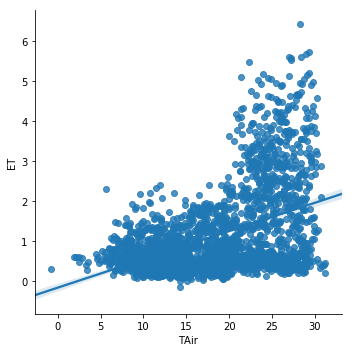

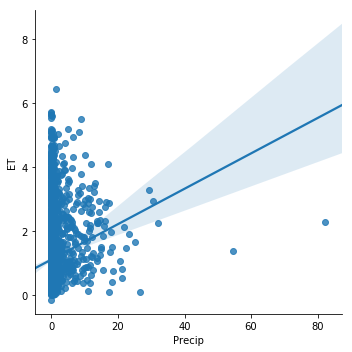

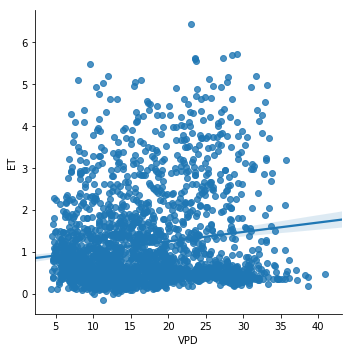

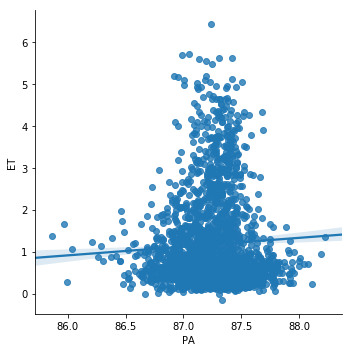

In [23]:
# - loop over met vars and plot data (first EDA before running regression to see whether linear regression is appropriate)
for mv in met_vars:
    
    # - plot lmplot
    sns.lmplot(x=mv, y='ET', data=data)
    plt.show()

In [70]:
# - If using numpy.corrcoef
# - set-up r2 variable to save
r2 = []

# - set-up y
y = data.ET.to_numpy()

# - loop over met vars and calculate r2
for mv in met_vars:
    
    # - set-up X
    X = data[mv].to_numpy()
    
    # - correlation and conversion to r2
    r2.append(np.corrcoef(X, y)[0,1]**2)

print(met_vars)
print(r2)

['TAir', 'Precip', 'VPD', 'PA']
[0.18244036309643077, 0.034903628119373024, 0.023594586328809845, 0.002600144330820126]


In [71]:
# - If using scipy.stats pearsonr
from scipy.stats import pearsonr
# - set-up r2 variable to save
r2 = []

# - set-up y
y = data.ET.to_numpy()

# - loop over met vars and calculate r2
for mv in met_vars:
    
    # - set-up X
    X = data[mv].to_numpy()
    
    # - get correlation
    correlation, pvalue = pearsonr(X, y)
    
    # - save and conversion to r2
    r2.append(correlation**2)
    

print(met_vars)
print(r2)

['TAir', 'Precip', 'VPD', 'PA']
[0.18244036309643089, 0.03490362811937308, 0.023594586328809827, 0.002600144330820127]


In [48]:
# - If using linear regression with sklearn
# - set-up X as ET (REMEMBER: for sklearn it must have 2 cols:
# - see slides 19 and 20 of the Exercise 12 statistical analysis in python powerpoint)
y = data.ET.to_numpy().reshape(-1,1)
print(y.shape)

(2190, 1)


In [51]:
# - set-up r2 variable to save
r2 = []

In [52]:
# - loop over met vars and calculate linear regression
for mv in met_vars:
    
    # - set-up y
    X = data[mv].to_numpy().reshape(-1,1)
    print(X.shape)
    
    # - set-up model
    lm = linear_model.LinearRegression()
    model = lm.fit(X, y)
    
    # - save r^2
    r2.append(model.score(X,y))
    

(2190, 1)
(2190, 1)
(2190, 1)
(2190, 1)


In [54]:
print(met_vars)
print(r2)

['TAir', 'Precip', 'VPD', 'PA']
[0.18244036309643086, 0.03490362811937331, 0.02359458632880984, 0.002600144330820231]


In [55]:
# - set-up slope variable to save
r = np.zeros_like(slope)

from scipy.stats import linregress

for nmv, mv in enumerate(met_vars):
    
    X = data[mv].to_numpy()
    y = data['ET'].to_numpy()
    r[nmv] = linregress(X, y)[2]

print(met_vars)
print(r**2)

['TAir', 'Precip', 'VPD', 'PA']
[0.18244036 0.03490363 0.02359459 0.00260014]


QUESTION:

1) Based on the r-squared (R$^{2}$) value, which meteorological variable explains most of the variability in ET?

ANSWER: Tair

### Remember to save your answers and upload them to Canvas by the end of the class. CHECK you have uploaded the right Jupyter Notebook to Canvas. EMAIL yourself a copy of the Jupyter Notebook (or save it to usb) in case something goes wrong with the Canvas submission.